<a href="https://colab.research.google.com/github/sebacea/AnEco2/blob/master/docs/Diapos/Clase04/OfertaDemanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="880000"> Un mercado competitivo </font>

Última edición en inglés de [la fuente original](https://github.com/braddelong/LS2019/blob/master/2019-08-10_market.ipynb): 2019-08-17 

Traducción: 2021-03-29

Una clase Python para un mercado simple con una mercancía donde los agentes son tomadores de precio.

El mercado se constituye de los siguientes objetos:

Una función de demanda lineal:

> (1) $ P_d = DAP_{max} - d*Q_d   $

Una función de oferta lineal:

> (2) $ P_s = CO_{min} + s*Q_s  $

$P_d$ es el precio pagado por el consumidor. $P_s$ es el precio percibido por el productor. $Q_d$ es la cantidad que el consumidor quiere comprar para su determinado precio. $Q_s$ es la cantidad que el productor desea proveer a su determinado precio. $DAP_{max}$ es la máxima disposición a pagar de cualquier consumider-el intercepto con el eje $y$ de la función de demanda. $CO_{min}$ es el mínimo costo oportunidad de cualquier productor-el intercepto con el eje $y$ de la función de oferta. $s$ es la pendiente de la función de oferta. $d$ es la pendiente de la función de demanda.

La clase provee métodos para computar el precio y cantidad de equilibrio competitivo, funciones de oferta y demanda, excedentes del consumidor y productor y excedentes totales.

La implementación es la siguiente:

In [4]:
class mercado:

    def __init__(self, DAPmax, COmin, d, s):
        """
        Configura los parámetros del mercado. DAP𝑚𝑎𝑥 es la máxima disposición a 
        pagar de cualquier consumider-el intercepto con el eje y de la función 
        de demanda. COmin es el mínimo costo oportunidad de cualquier productor-el 
        intercepto con el eje y de la función de oferta. s es la pendiente de la f
        unción de oferta. d es la pendiente de la función de demanda...
        """
        
        self.DAPmax, self.COmin, self.d, self.s = DAPmax, COmin, d, s
        
        if DAPmax < COmin:
            raise ValueError('Demanda insuficiente.')

    def cantidad_equilibrio(self):
        "Cálculo cantidad de equilibrio"
        return  (self.DAPmax - self.COmin)/(self.d + self.s)

    def precio_equilibrio(self):
        "Cálculo cantidad de equilibrio"
        return  self.DAPmax - self.d * self.cantidad_equilibrio()

    def excedente_consumidor(self):
        "Cálculo excedente consumidor"
        return (self.DAPmax - self.precio_equilibrio())*self.cantidad_equilibrio()/2

    def excedente_productor(self):
        "Cálculo excedente productor"
        return (self.precio_equilibrio() - self.COmin) * self.cantidad_equilibrio() /2

    def excedente_total(self):
        "Cálculo excedente total"
        return self.excedente_productor() + self.excedente_consumidor()
    
    def demanda(self,x):
        "Función demanda"
        return self.DAPmax - self.d*x
        
    def oferta(self,x):
        "Función oferta"
        return self.COmin + self.s*x

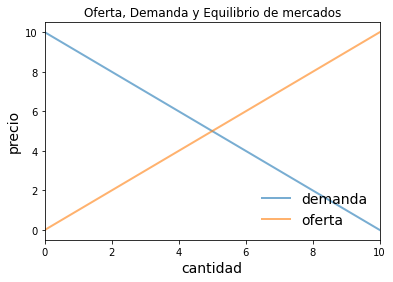

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Parámetros iniciales DAPmax, COmin, d, s
params_ini = 10,0,1,1
m = mercado(*params_ini)

q_max = m.cantidad_equilibrio() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.demanda(q_grid)
ps = m.oferta(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demanda')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='oferta')
ax.set_xlabel('cantidad', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('precio', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
ax.set(title='Oferta, Demanda y Equilibrio de mercados')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Baseline DAPmax, COmin, d, s
params_ini = 10,0,1,1
m = mercado(*params_ini)

print("Excedente productor =",m.excedente_productor())
print("Excedente consumidor =",m.excedente_consumidor())
print("Excedente total =",m.excedente_total())
print("Cantidad de equilibrio =",m.cantidad_equilibrio())
print("Precio de equilibrio =",m.precio_equilibrio())

Excedente productor = 12.5
Excedente consumidor = 12.5
Excedente total = 25.0
Cantidad de equilibrio = 5.0
Precio de equilibrio = 5.0
